## Gregory M. Eirich
## Example 
## Lab #2

In [ ]:
Some preliminary set up code:

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/gme2101/Desktop/Data Analysis Data') # change working directory
d = pd.read_csv("GSS.2006.csv")
print(d.head())

   vpsu  vstrat  adults  ballot  dateintv  famgen  form  formwt  gender1  \
0     1    1957       1       3       316       2     1       1        2   
1     1    1957       2       2       630       1     2       1        2   
2     1    1957       2       2       314       2     1       1        2   
3     1    1957       1       1       313       1     2       1        2   
4     1    1957       3       1       322       2     2       1        2   

   hompop  ...  away7  gender14  old14  relate14  relhh14  relhhd14  relsp14  \
0       3  ...    NaN       NaN    NaN       NaN      NaN       NaN      NaN   
1       2  ...    NaN       NaN    NaN       NaN      NaN       NaN      NaN   
2       2  ...    NaN       NaN    NaN       NaN      NaN       NaN      NaN   
3       1  ...    NaN       NaN    NaN       NaN      NaN       NaN      NaN   
4       3  ...    NaN       NaN    NaN       NaN      NaN       NaN      NaN   

   where12  where6  where7  
0      NaN     NaN     NaN  
1   

## 1. Recode 2 variable into new categories.  They can both be continuous-ish or both be nominal-ish, or one of each.  Tell me what you did and explain the variable(s).


## Create a number of categories for religious attendance: low, medium, high ##

In [3]:
## 3 options of low, medium, high ##

conditions = [
    (d['attend'] < 3) ,
    (d['attend'] >2 ) & (d['attend'] <6),
    (d['attend'] > 5)]
choices = [1, 2, 3]
d['cut'] = np.select(conditions, choices, default=np.nan)


In [4]:
# Look at the results

d.cut.describe()

count    4491.000000
mean        1.892006
std         0.850602
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         3.000000
Name: cut, dtype: float64

In [5]:
## How many of each category are there?

d.cut.value_counts()

1.0    1893
3.0    1408
2.0    1190
Name: cut, dtype: int64

## Check the recoding:  It is "1" for categories less than 3, it is "2" for categories from 3 to 5, and it is "3" for categories greater than 5.

In [6]:
res = pd.crosstab(d.attend, d.cut)
res.astype('float').div(res.sum(axis=0), axis=1)

cut,1.0,2.0,3.0
attend,,,
0.0,0.538827,0.000000,0.000000
1.0,0.159535,0.000000,0.000000
2.0,0.301638,0.000000,0.000000
3.0,0.000000,0.421849,0.000000
4.0,0.000000,0.258824,0.000000
5.0,0.000000,0.319328,0.000000
6.0,0.000000,0.000000,0.170455
7.0,0.000000,0.000000,0.595881
8.0,0.000000,0.000000,0.233665


In [7]:
#Simply another way to do the same thing as above:  A nice function someone wrote to do the same thing:

def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

#Binning attend:

cut_points = [2,5]
labels = ["low","medium","high"]
d["attend_cut"] = binning(d["attend"], cut_points, labels)
##print pd.value_counts(d["attend_cut"], sort=False)##


In [8]:
## See it works the same way...

summary = d.attend_cut.describe()
summary = summary.transpose()
summary

count     4491
unique       3
top        low
freq      1893
Name: attend_cut, dtype: object

In [9]:
## See it works the same way...

d.attend_cut.value_counts()

low       1893
high      1408
medium    1190
Name: attend_cut, dtype: int64

In [10]:
## See it works the same way...

res = pd.crosstab(d.attend, d.attend_cut)
res.astype('float').div(res.sum(axis=0), axis=1)

attend_cut,low,medium,high
attend,,,
0.0,0.538827,0.000000,0.000000
1.0,0.159535,0.000000,0.000000
2.0,0.301638,0.000000,0.000000
3.0,0.000000,0.421849,0.000000
4.0,0.000000,0.258824,0.000000
5.0,0.000000,0.319328,0.000000
6.0,0.000000,0.000000,0.170455
7.0,0.000000,0.000000,0.595881
8.0,0.000000,0.000000,0.233665


## Below is a binary recode, where we make it 1 if "How often do you attend religious services?" is everything as frequent as 4 or more, which is About once a month or more, 0 otherwise

In [47]:
##Simple binary cut##

conditions = [
    (d['attend'] < 5) ,
    (d['attend'] >4 )]
choices = [0,1]
d['high'] = np.select(conditions, choices, default=np.nan)

## Check the recoding:  It is 0 for all categories less than 5 and 1 for everything greater than or equal to 5

In [46]:
res = pd.crosstab(d.attend, d.high)
res.astype('float').div(res.sum(axis=0), axis=1)

high,0.0,1.0
attend,,
0.0,0.377358,0.000000
1.0,0.111728,0.000000
2.0,0.211247,0.000000
3.0,0.185720,0.000000
4.0,0.113947,0.000000
5.0,0.000000,0.212528
6.0,0.000000,0.134228
7.0,0.000000,0.469239
8.0,0.000000,0.184004


## Let's look at another variable - ## this is a question about "To what extent do you agree or disagree with the following statements? I see myself as someone who... c. Does a thorough job", with 1 being strongly agree and 5 being strongly disagree.

In [12]:
## Table 2 ##

my_tab = pd.crosstab(index=d["big5c1"],  # Make a crosstab
                              columns="count")     
def compute_percentage(x):
      pct = float(x/my_tab['count'].sum()) * 100
      return round(pct, 2)

my_tab['percentage'] = my_tab.apply(compute_percentage, axis=1)

my_tab

col_0,count,percentage
big5c1,,
1.0,743,49.08
2.0,719,47.49
3.0,43,2.84
4.0,9,0.59


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BF4FF98>]],
      dtype=object)

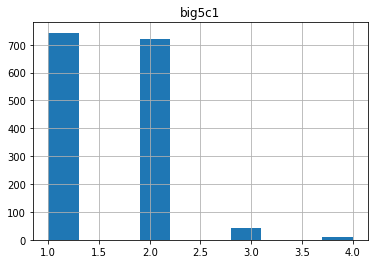

In [13]:
d.hist(column='big5c1')

##  People who say they strongly agree are coded 1 for thorough, otherwise 0.

In [14]:
conditions = [
    (d['big5c1'] < 2) ,
    (d['big5c1'] >=2 )]
choices = [1,0]
d['thorough'] = np.select(conditions, choices, default=np.nan)

In [18]:
my_tab_thor = pd.crosstab(index=d["thorough"],  # Make a crosstab
                              columns="count")     

def compute_percentage(x):
      pct = float(x/my_tab['count'].sum()) * 100
      return round(pct, 2)

my_tab_thor['percentage'] = my_tab_thor.apply(compute_percentage, axis=1)

my_tab_thor

col_0,count,percentage
thorough,,
0.0,771,50.92
1.0,743,49.08


## 2. Use one (or both) of your recoded variables to do a cross-tabulation.  Explain your results.

## The below results indicate that being more thorough is not associated with going to religious services more (low-religious people are thorough at 48.5%, while high religious people are thorough at 49.7% ~ essentially the same), which is contrary to what some psychological theories would have predicted

In [28]:
res = pd.crosstab(d.thorough, d.high)
res.astype('float').div(res.sum(axis=0), axis=1)

high,0.0,1.0
thorough,,
0.0,0.514317,0.502504
1.0,0.485683,0.497496


## BTW: You can use pandas "crosstab" function to get column percentages now

In [45]:
res.p = pd.crosstab(d['thorough'], d['high'], normalize='columns')
res.p

high,0.0,1.0
thorough,,
0.0,0.514317,0.502504
1.0,0.485683,0.497496


## 3. Run a linear regression with 1 independent and 1 dependent variable; make all of the recodes necessary to make the model as easy to interpret as possible; and explain your results.

## Asking the question: How do you think one's hours should be related to one's spouse's hours?

In [32]:
lm = smf.ols(formula = 'hrs1~sphrs1', data = d).fit()
print (lm.summary()) 

                            OLS Regression Results                            
Dep. Variable:                   hrs1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.002
Date:                Thu, 30 May 2019   Prob (F-statistic):              0.157
Time:                        13:59:30   Log-Likelihood:                -4129.5
No. Observations:                1013   AIC:                             8263.
Df Residuals:                    1011   BIC:                             8273.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.5629      1.448     28.021      0.0

## Conclusion: Knowing your spouse's hours at work do not help predicting your hours at work.  A coefficient of 0.04662 indicates no obvious relationship between my hours and my spouse's hours.

## 4. Plot two variables, either as a scatter plot or boxplot; add in trend/regression lines; and explain your results.

## Here is plotting of sphrs1 against hrs1 using seaborn:

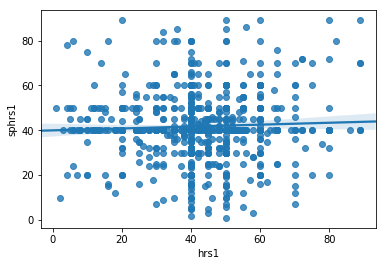

In [42]:
import seaborn as sns
sns.regplot(d['hrs1'],d['sphrs1'])